from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings("ignore")


In [65]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


## Loading the dataset

In [66]:
df = pd.read_csv(r"C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\diabetes.csv")


In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


# EDA

In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

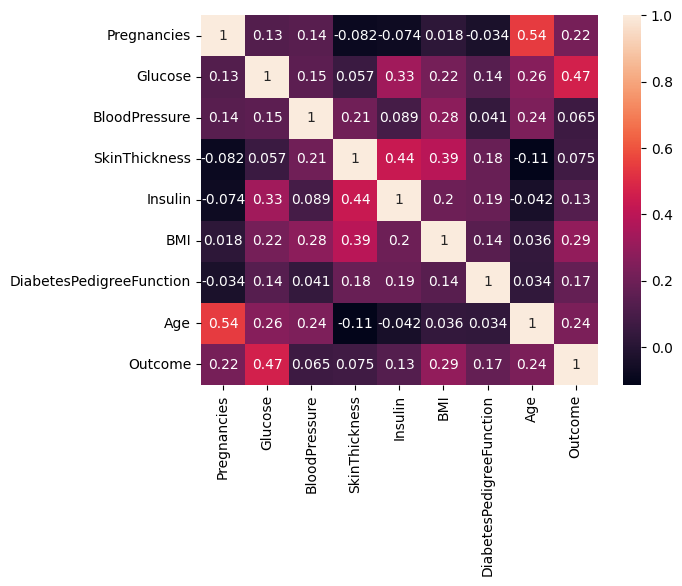

In [71]:
sns.heatmap(df.corr(), annot=True)


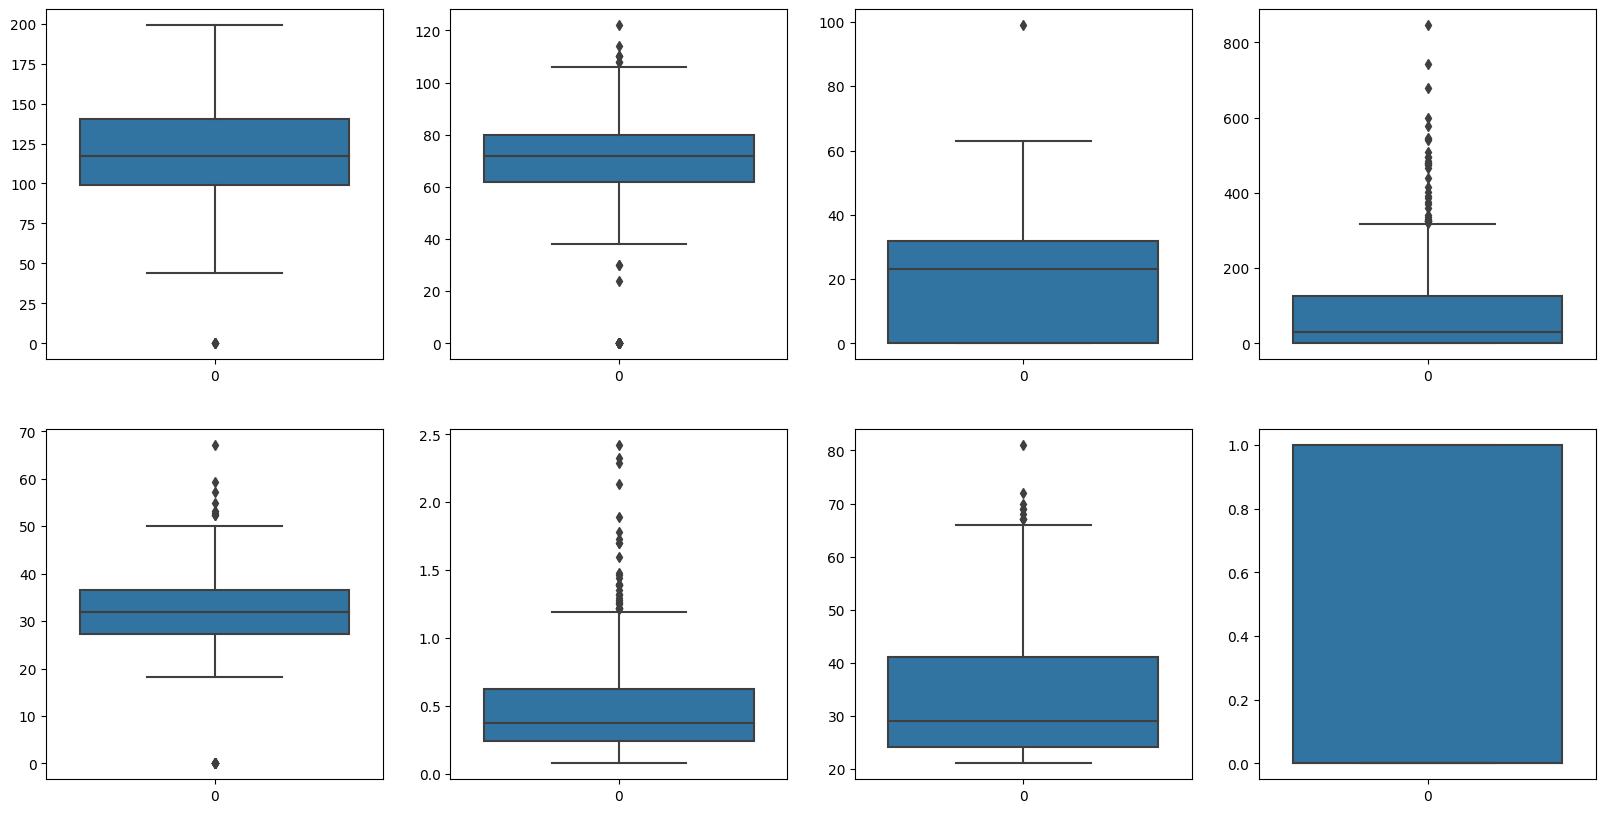

In [72]:
# Plotting the boxplot for the outliers
plt.figure(figsize=(20, 10))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    sns.boxplot(df.iloc[:, i])


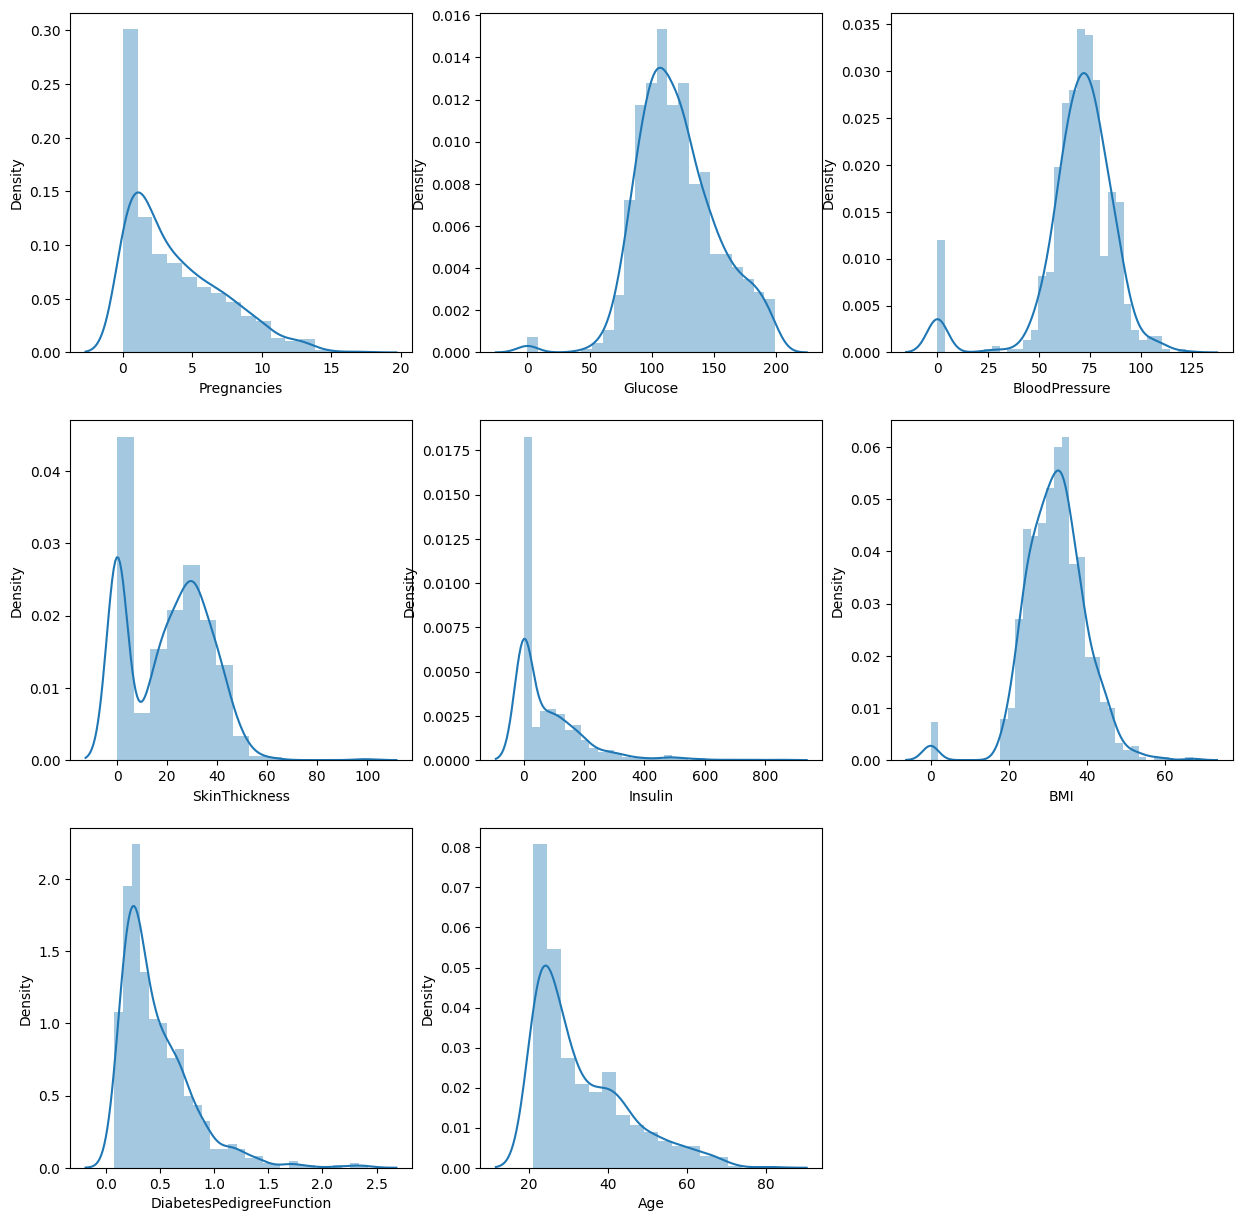

In [73]:
# Plotting the distribution of each feature
plt.figure(figsize=(15, 15))
for i in range(1, 9):
    plt.subplot(3, 3, i)
    sns.distplot(df.iloc[:, i - 1], kde=True)


In [74]:
# Removing the outliers using zscore
from scipy.stats import zscore

z = np.abs(zscore(df))
df_new = df[(z < 3).all(axis=1)]
df_new.shape
    


(688, 9)

In [75]:
# Dropping the columns which are not required
df_new.drop(["SkinThickness", "BloodPressure"], axis=1, inplace=True)


Pregnancies : [ 6  1  8  5  3  4 10  0  7  9 11 13  2 12]


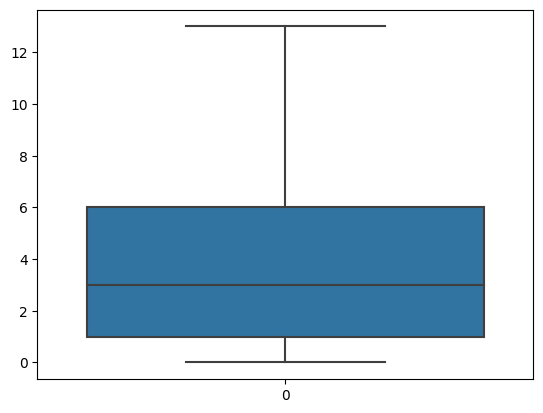

Glucose : [148  85 183  89 116  78 110 168 139 166 118 107 103 115 126  99 196 119
 143 125 147  97 145 117 109 158  88  92 122 138 102  90 111 180 133 106
 171 159 146  71 101 176 150  73 187 100 105  44 141 114  95 129  79  62
 112 113  83 137  80 123  81 134 142 144  93 163 151  96  76 160 124 162
 120 173 170  84 128 108 154  57 136 156 188 152 131 104  75 179 130  87
 194 184 140  74 181 164  91  86 193 155 191 161  77 182 157 165 178  61
 189  98  82  72 197  94 135 132 195  68 127 186 198 121  67 174 167 199
  56 169 149 175  65 153 190]


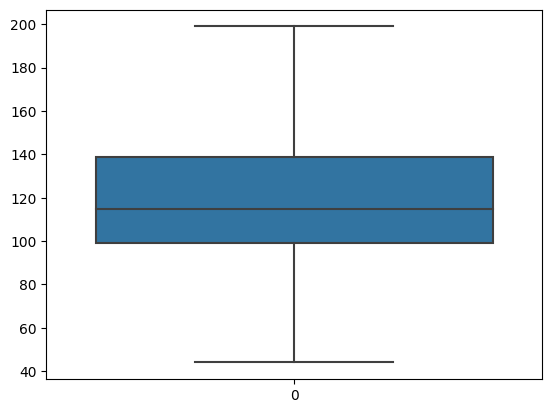

Insulin : [  0  94  88 175 230  83  96 235 146 115 140 110 245  54 192 207  70 240
  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176  48  64 228
  76 220  40 152  18 135  37  51  99 145 168 225  49  50  92 325  63 284
 119 204 155  53 105 285 156  78 130  55  58 114 160 210 318  44 190 280
  87 271 129 120  56  32 370  45 194 402 258 375 150  67  57 116 278 122
  75  74 182 360 215  42 132 148 180 205  85 231  29  68  52 255 171  73
 108  43 167 249 293  66 158  84  72  59  81 196 415 165 310  61 170 277
  60  95 237 191 328 250 265 193  79  86 326 188 106  65 166 274  77 126
 330 185  25  41 272 321 144  15 183  91  46 159 200 335 387  22 291 392
 178 127  16 112]


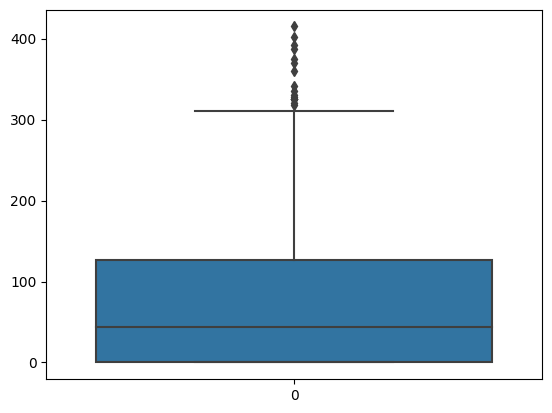

BMI : [33.6 26.6 23.3 28.1 25.6 31.  37.6 38.  27.1 25.8 45.8 29.6 43.3 34.6
 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2 22.2 34.1 36.  31.6 24.8 19.9
 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2 22.7 45.4 27.4 29.7 28.  39.1
 19.4 24.2 24.4 33.7 34.7 23.  37.7 46.8 41.5 25.  25.4 32.8 32.5 42.7
 19.6 28.9 28.6 43.4 35.1 32.  32.6 22.4 29.3 24.6 48.8 32.4 38.5 26.5
 19.1 46.7 23.8 24.7 33.9 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3
 37.4 33.3 31.2 30.5 28.2 53.2 34.2 55.  42.9 34.5 27.9 38.3 21.1 33.8
 30.8 36.9 39.5 27.3 21.9 47.9 50.  25.2 37.2 44.2 29.9 31.9 28.4 43.5
 32.7 45.  34.9 26.8 35.9 22.6 33.1 30.4 24.3 22.9 34.8 30.9 40.1 23.9
 37.5 35.5 27.7 42.8 42.6 41.8 35.8 30.  37.8 28.8 23.6 35.7 45.2 44.
 46.2 35.  43.6 44.1 18.4 29.2 30.1 25.9 32.1 40.  25.1 45.6 40.5 27.8
 24.9 25.3 37.9 27.  26.  20.8 36.1 30.7 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 27.5 45.5 39.9 36.8 21.8 42.2 34.4 27.2 35.3 36.5 29.8 39.2
 36.2 48.3 20.  22.3 32.3 45.7 23.7 22.1 42.1 42.4 18.2 26.4 45.3 40.6
 

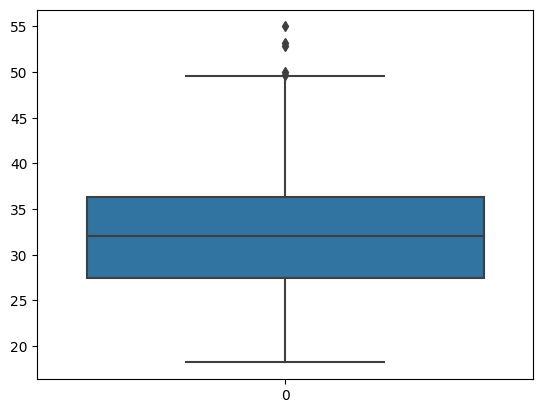

DiabetesPedigreeFunction : [0.627 0.351 0.672 0.167 0.201 0.248 0.191 0.537 1.441 0.587 0.551 0.254
 0.183 0.529 0.704 0.388 0.451 0.263 0.205 0.257 0.487 0.245 0.337 0.546
 0.851 0.267 0.188 0.512 0.966 0.42  0.665 0.503 1.39  0.271 0.696 0.235
 0.721 0.294 0.564 0.586 0.344 0.491 0.526 0.342 0.467 0.718 0.962 0.173
 0.27  0.699 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411 0.583 0.231
 0.396 0.391 0.37  0.307 0.14  0.767 0.237 0.227 0.698 0.178 0.324 0.165
 0.443 0.261 0.277 0.761 0.255 0.13  0.323 0.356 0.325 1.222 0.179 0.262
 0.283 0.93  0.801 0.207 0.287 0.336 0.247 0.199 0.192 0.588 0.539 0.22
 0.654 0.223 0.759 0.26  0.404 0.278 0.496 0.452 0.403 0.741 0.361 1.114
 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318 0.272 0.096
 1.4   0.218 0.085 0.399 0.432 1.189 0.137 0.637 0.833 0.229 0.204 0.368
 0.743 0.722 0.256 0.709 0.471 0.495 0.18  0.542 0.678 0.719 0.382 0.19
 0.956 0.084 0.725 0.244 0.745 1.321 0.64  0.142 0.374 0.383 0.136 0.395
 0.187 0.905 0.15  0.874 0

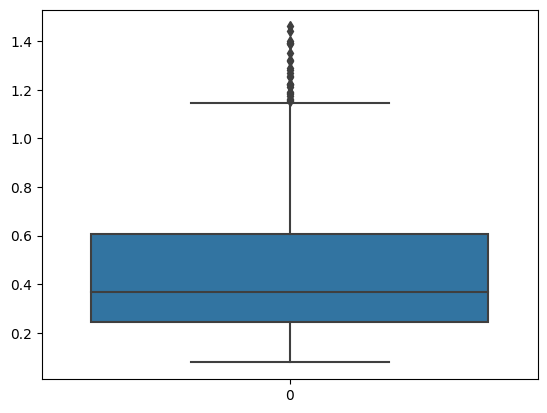

Age : [50 31 32 21 30 26 34 57 51 33 27 41 29 43 22 38 60 28 45 35 46 56 37 48
 54 40 58 42 39 36 24 25 23 61 62 55 65 47 52 66 49 44 63 59 67 64 53 68]


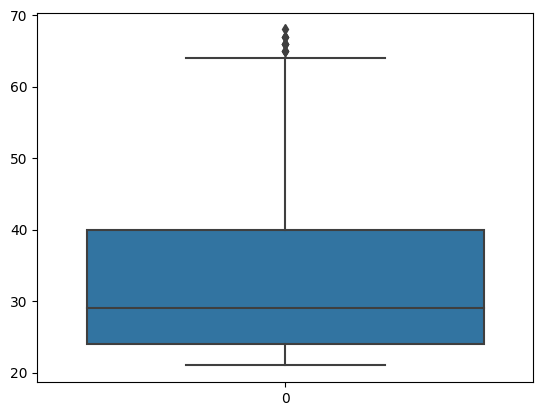

Outcome : [1 0]


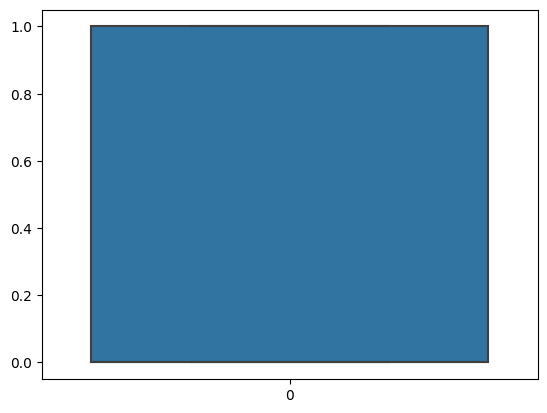

In [76]:
for i in df_new.columns:
    print(i, ":", df_new[i].unique())
    sns.boxplot(df_new[i])
    plt.show()

In [77]:
df.skew()

Pregnancies                 0.90
Glucose                     0.17
BloodPressure              -1.84
SkinThickness               0.11
Insulin                     2.27
BMI                        -0.43
DiabetesPedigreeFunction    1.92
Age                         1.13
Outcome                     0.64
dtype: float64

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [79]:
# Splitting the data into X and y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [80]:
# Importing the ML Algorithms

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing metrics

from sklearn.metrics import (
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)


In [81]:
# Splitting the data into train and test
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# We are not scaling the data as the data becaomes naive bayes is not affected by the scaling of the data

In [82]:
# Creating a model list with model name and models
model_list = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=150)),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("SVM", SVC(kernel="rbf")),
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=1))
]

# Modeling with Original Data

In [83]:
model_dict = {}
for name, model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_dict[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_pred),
        "Cross Val Score": cross_val_score(model, X_train, y_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict).T
model_metrics.sort_values(
    by=["ROC AUC Score", "Accuracy"], ascending=False) * 100


,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
CatBoost,80.52,75.00,70.59,77.33,73.78
Logistic Regression,79.87,76.74,68.04,75.56,76.55
Random Forest,79.87,76.74,68.04,75.56,74.75
XGBoost,77.92,70.83,66.67,74.48,71.66
GaussianNB,77.27,69.39,66.02,73.98,75.40
SVM,76.62,73.68,60.87,70.93,74.60
KNN,71.43,59.26,59.26,68.63,64.99
Decision Tree,70.13,59.09,53.06,65.07,68.40
BernoulliNB,64.94,50.00,10.00,51.28,65.15


In [84]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# OverSampling Data Using SMOTE

In [85]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
XR, yR = smote.fit_resample(X, y)

# Splitting the data into train and test

XR_train, XR_test, yR_train, yR_test = train_test_split(
    XR, yR, test_size=0.2, random_state=0
)
yR.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

# Modeling using OverSampled Data with SMOTE

In [86]:
model_dict2 = {}
for name, model in model_list:
    model.fit(XR_train, yR_train)
    y_pred = model.predict(XR_test)
    model_dict2[name] = {
        "Accuracy": accuracy_score(yR_test, y_pred),
        "Precision": precision_score(yR_test, y_pred),
        "F1 Score": f1_score(yR_test, y_pred),
        "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        "Cross Val Score": cross_val_score(model, XR_train, yR_train, cv=5).mean(),
    }
    pass

# Creating a dataframe for the model metrics
model_metrics = pd.DataFrame(model_dict2).T
model_metrics.sort_values(
    by=["ROC AUC Score", "Accuracy"], ascending=False) * 100


,Accuracy,Precision,F1 Score,ROC AUC Score,Cross Val Score
Random Forest,85.00,81.55,84.85,85.16,79.00
CatBoost,85.00,83.51,84.38,85.01,77.25
XGBoost,81.50,76.85,81.77,81.78,76.63
KNN,80.00,72.36,81.65,80.65,76.13
Decision Tree,78.50,76.00,77.95,78.57,71.25
Logistic Regression,77.00,75.79,75.79,76.94,72.62
GaussianNB,77.00,77.53,75.00,76.79,72.12
SVM,74.00,73.12,72.34,73.88,71.12
BernoulliNB,50.00,47.19,45.65,49.72,54.12


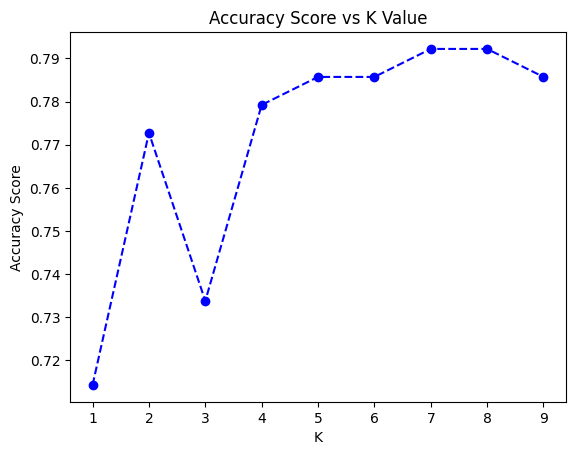

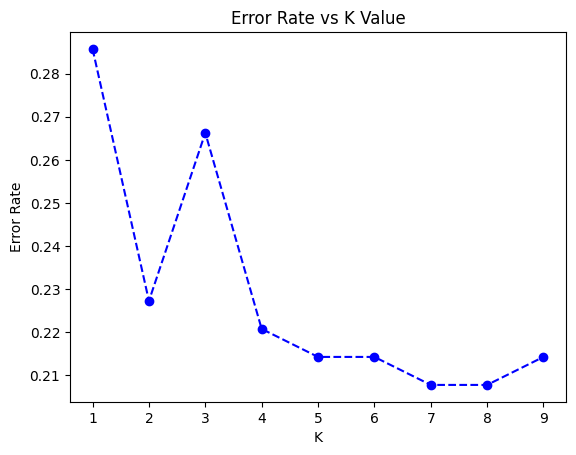

In [87]:
# Creating elbow plot to find best value of K using accuracy score

accuracy_score = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_score.append(np.mean(pred_i == y_test))
    pass



plt.plot(range(1, 10), accuracy_score, color="blue", linestyle="dashed", marker="o")
plt.title("Accuracy Score vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.show()

# Creating elbow plot to find best value of K using error rate

error_rate = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    pass


plt.plot(range(1, 10), error_rate, color="blue", linestyle="dashed", marker="o")
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

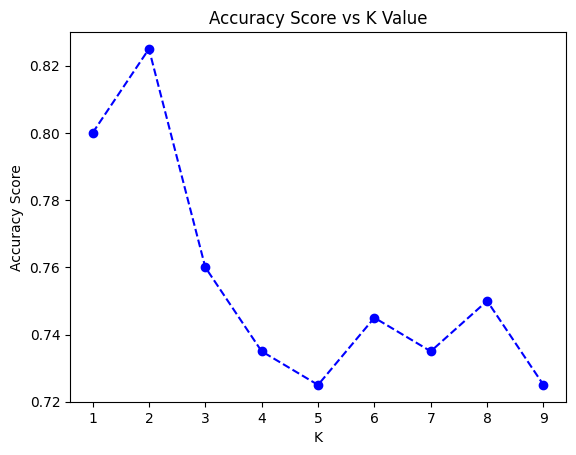

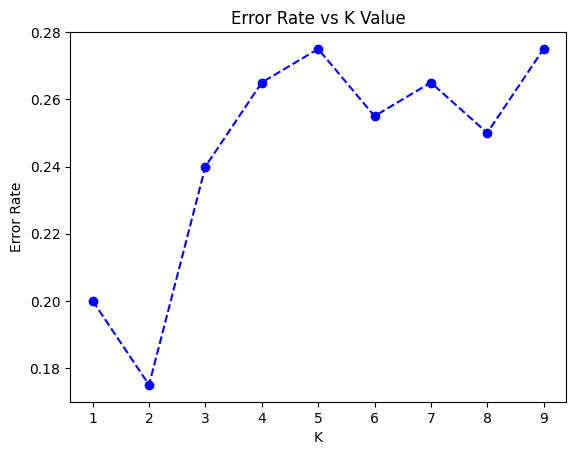

In [88]:
# Creating elbow plot to find best value of K using accuracy score

accuracy_score = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XR_train, yR_train)
    pred_i = knn.predict(XR_test)
    accuracy_score.append(np.mean(pred_i == yR_test))
    pass



plt.plot(range(1, 10), accuracy_score, color="blue", linestyle="dashed", marker="o")
plt.title("Accuracy Score vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.show()

# Creating elbow plot to find best value of K using error rate

error_rate = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XR_train, yR_train)
    pred_i = knn.predict(XR_test)
    error_rate.append(np.mean(pred_i != yR_test))
    pass


plt.plot(range(1, 10), error_rate, color="blue", linestyle="dashed", marker="o")
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()